# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from InitCondPOHomogeous import InitCondPOHomogeneous
from FloquetExponentsVariationals import ComputeFloquetExponents
from RoutineFloquet import RoutineFloquet
from PlotFloquetExponents import PlotFloquetExponents
import matplotlib.pyplot as plt

In [3]:
from Continuation import ContinuationRoutine

In [63]:
#Load data structural connectivity matrix
data=np.load('NormalizedMatrix.npz')
norm_matrix = data['normalized_matrix']

#Compute eigenvalues and eigenvectors of connectivity matrix W
vapsConn,vepsConn = np.linalg.eig(norm_matrix)

Nvariables = 6
Npop = 90
ModelParams = dict(tau_e = 8,
            tau_i = 8,
            tau_se=1,
            tau_si=5,
            nu_e = -5,
            nu_i = -5,
            Delta_e = 1,
            Delta_i = 1,
            Jee = 5,
            Jei = 13,
            Jii = 5,
            Jie = 13,
            Iext_i=0)

In [66]:
vector_eps,vector_Iext_e = ContinuationRoutine(vapsConn,Nvariables,Npop,ModelParams)

Maximum Floquet Exponent starter: -3.332046096901029e-06
epsilon: 18.248809525000002
max_mu1: 0.0032992864019429986
------ Inside cross-------
Approx Iext_i: 9.82423437
max_mu2: 0.004212714263029268
------ Inside cross-------
Approx Iext_i: 9.924234369999999
max_mu2: 0.00021315088773713028
------ Inside cross-------
Approx Iext_i: 10.024234369999999
max_mu2: -0.002659006465604966
******* Inside bisection *******
******* Inside bisection *******
******* Inside bisection *******
******* Inside bisection *******
******* Inside bisection *******
******* Inside bisection *******
Searching direction: 1
 DEFINITIVE Iext_e: 9.932046869999999
epsilon: 18.36904762
max_mu1: -0.0008725217961576062
------ Inside cross-------
Approx Iext_i: 9.83204687
max_mu2: 0.005293331829809147
******* Inside bisection *******
******* Inside bisection *******
******* Inside bisection *******
******* Inside bisection *******
******* Inside bisection *******
******* Inside bisection *******
******* Inside bisection

In [18]:
vector_eps=np.flip(vector_eps)
vector_eps

array([19.38 , 19.504, 19.628, 19.752, 19.876, 20.   ])

In [19]:
vector_Iext_e=np.flip(vector_Iext_e)
vector_Iext_e

array([9.67640625, 9.58421875, 9.48070312, 9.36390625, 9.23382812,
       9.485     ])

In [70]:
vector_Iext_e[0]=9.72423437

In [71]:
vector_eps

array([18.12857143, 18.24880953, 18.36904762, 18.48928572, 18.60952381,
       18.72976191, 18.85      ])

In [72]:
vector_Iext_e

array([9.72423437, 9.93204687, 9.90665624, 9.89674414, 9.85807226,
       9.83434179, 9.81052587])

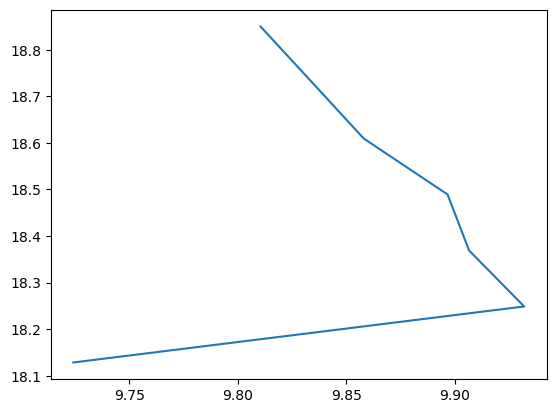

In [73]:
plt.plot(vector_Iext_e,vector_eps)

In [37]:
np.savez('SecondDownLeft.npz',vector_Iext_e=vector_Iext_e,vector_eps=vector_eps)


In [20]:
vector_Iext_eHalf = vector_Iext_e
vector_epsHalf = vector_eps 

In [ ]:
vector_Iext_e2068Cusp

array([0.        , 5.33779297, 5.27998047, 5.22333984, 5.16708984,
       5.11201172, 5.05810547, 5.00537109, 4.95419922, 4.90498047,
       4.85771484, 4.81357422, 4.77177734, 4.73388672, 4.70341797])

In [14]:
SecondLeft = np.load('SecondUpLeft.npz')

In [15]:
vector_epsSecondLeft = SecondLeft['vector_eps']
vector_Iext_eSecondLeft = SecondLeft['vector_Iext_e']

In [16]:
vector_epsSecondLeft

array([20.        , 20.1025641 , 20.20512821, 20.30769231, 20.41025641,
       20.51282051, 20.61538462, 20.71794872, 20.82051282, 20.92307692,
       21.02564103, 21.12820513, 21.23076923, 21.33333333, 21.43589744,
       21.53846154, 21.64102564, 21.74358974, 21.84615385, 21.94871795,
       22.05128205, 22.15384615, 22.25641026, 22.35897436, 22.46153846,
       22.56410256, 22.66666667, 22.76923077, 22.87179487, 22.97435897,
       23.07692308, 23.17948718, 23.28205128, 23.38461538, 23.48717949,
       23.58974359, 23.69230769, 23.79487179, 23.8974359 , 24.        ])

In [17]:
vector_Iext_eSecondLeft

array([9.485     , 9.48875977, 9.45587402, 9.42047363, 9.38248535,
       9.34830566, 9.31549316, 9.28385254, 9.25221191, 9.03824707,
       9.1573877 , 9.16986328, 9.15449463, 9.12633911, 9.09132935,
       9.04870239, 9.00524536, 8.95993286, 8.90885864, 8.84753052,
       8.77604614, 8.69596802, 8.60729614, 8.50885864, 8.39792114,
       8.26823364, 8.10104614, 7.80104614, 6.77497192, 6.64880005,
       6.52712036, 6.40592896, 6.28337036, 6.15934692, 6.03376099,
       5.90661255, 5.77731567, 5.64567505, 5.51149536, 5.37340942])

In [20]:
eps_CompleteSecondRight = np.concat([vector_eps[0:len(vector_eps)-1],vector_epsSecondLeft])
eps_CompleteSecondRight

array([19.38      , 19.504     , 19.628     , 19.752     , 19.876     ,
       20.        , 20.1025641 , 20.20512821, 20.30769231, 20.41025641,
       20.51282051, 20.61538462, 20.71794872, 20.82051282, 20.92307692,
       21.02564103, 21.12820513, 21.23076923, 21.33333333, 21.43589744,
       21.53846154, 21.64102564, 21.74358974, 21.84615385, 21.94871795,
       22.05128205, 22.15384615, 22.25641026, 22.35897436, 22.46153846,
       22.56410256, 22.66666667, 22.76923077, 22.87179487, 22.97435897,
       23.07692308, 23.17948718, 23.28205128, 23.38461538, 23.48717949,
       23.58974359, 23.69230769, 23.79487179, 23.8974359 , 24.        ])

In [26]:
Iext_e_CompleteSecondRight = np.concat([vector_Iext_e[0:len(vector_Iext_e)-1],vector_Iext_eSecondLeft])
Iext_e_CompleteSecondRight

array([9.67640625, 9.58421875, 9.48070312, 9.36390625, 9.23382812,
       9.485     , 9.48875977, 9.45587402, 9.42047363, 9.38248535,
       9.34830566, 9.31549316, 9.28385254, 9.25221191, 9.03824707,
       9.1573877 , 9.16986328, 9.15449463, 9.12633911, 9.09132935,
       9.04870239, 9.00524536, 8.95993286, 8.90885864, 8.84753052,
       8.77604614, 8.69596802, 8.60729614, 8.50885864, 8.39792114,
       8.26823364, 8.10104614, 7.80104614, 6.77497192, 6.64880005,
       6.52712036, 6.40592896, 6.28337036, 6.15934692, 6.03376099,
       5.90661255, 5.77731567, 5.64567505, 5.51149536, 5.37340942])

In [74]:
dataMiddleFirstRight = np.load('MiddleFirstRightMost.npz')

In [75]:
vector_epsMiddleFirstRight = dataMiddleFirstRight['vector_eps']
vector_Iext_eMiddleFirstRight = dataMiddleFirstRight['vector_Iext_e']

In [76]:
vector_epsMiddleFirstRight = np.flip(vector_epsMiddleFirstRight)
vector_epsMiddleFirstRight

array([15.        , 15.1025641 , 15.20512821, 15.30769231, 15.41025641,
       15.51282051, 15.61538462, 15.71794872, 15.82051282, 15.92307692,
       16.02564103, 16.12820513, 16.23076923, 16.33333333, 16.43589744,
       16.53846154, 16.64102564, 16.74358974, 16.84615385, 16.94871795,
       17.05128205, 17.15384615, 17.25641026, 17.35897436, 17.46153846,
       17.56410256, 17.66666667, 17.76923077, 17.87179487, 17.97435897,
       18.07692308, 18.17948718, 18.28205128, 18.38461538, 18.48717949,
       18.58974359, 18.69230769, 18.79487179, 18.8974359 , 19.        ])

In [77]:
vector_Iext_eMiddleFirstRight = np.flip(vector_Iext_eMiddleFirstRight)
vector_Iext_eMiddleFirstRight

array([10.57869648, 10.57088398, 10.55760273, 10.54119648, 10.52127461,
       10.51971211, 10.54002461, 10.52791523, 10.49822773, 10.45525898,
       10.42928242, 10.3835793 , 10.26717305, 10.26404805, 10.20994648,
       10.1601418 , 10.1335793 , 10.11248555, 10.14178242, 10.19334492,
       10.21912617, 10.20818867, 10.17693867, 10.13865742, 10.09803242,
       10.05779805, 10.01756367,  9.99100117,  9.98396992,  9.98006367,
        9.96600117,  9.42225117,  9.26175313,  9.11629414,  8.97942891,
        8.84783711,  8.72024922,  8.59485859,  8.4707375 ,  8.3473    ])

In [78]:
eps_unionUpperMiddle=np.concatenate([vector_epsMiddleFirstRight[0:len(vector_epsUpRight)-1],vector_epsUpRight])
eps_unionUpperMiddle

array([15.        , 15.1025641 , 15.20512821, 15.30769231, 15.41025641,
       15.51282051, 15.61538462, 15.71794872, 15.82051282, 15.92307692,
       16.02564103, 16.12820513, 16.23076923, 16.33333333, 16.43589744,
       16.53846154, 16.64102564, 16.74358974, 16.84615385, 16.94871795,
       17.05128205, 17.15384615, 17.25641026, 19.        , 19.10717391,
       19.21434783, 19.32152174, 19.42869565, 19.53586957, 19.64304348,
       19.75021739, 19.8573913 , 19.96456522, 20.07173913, 20.17891304,
       20.28608696, 20.39326087, 20.50043478, 20.6076087 , 20.71478261,
       20.82195652, 20.92913043, 21.03630435, 21.14347826, 21.25065217,
       21.35782609, 21.465     ])

In [79]:
Iext_e_unionUpperMiddle=np.concatenate([vector_Iext_eMiddleFirstRight[0:len(vector_epsUpRight)-1],vector_Iext_eUpRight])
Iext_e_unionUpperMiddle

array([10.57869648, 10.57088398, 10.55760273, 10.54119648, 10.52127461,
       10.51971211, 10.54002461, 10.52791523, 10.49822773, 10.45525898,
       10.42928242, 10.3835793 , 10.26717305, 10.26404805, 10.20994648,
       10.1601418 , 10.1335793 , 10.11248555, 10.14178242, 10.19334492,
       10.21912617, 10.20818867, 10.17693867,  8.3473    ,  8.21849141,
        8.08958516,  7.96019063,  7.83021016,  7.69930195,  7.56746602,
        7.4344582 ,  7.30018086,  7.16453633,  7.02742695,  6.88865742,
        6.74861836,  6.60721211,  6.46395039,  6.31844258,  6.17059102,
        6.02000508,  5.86609883,  5.70828633,  5.54578633,  5.37625508,
        5.19578633,  4.99734883])

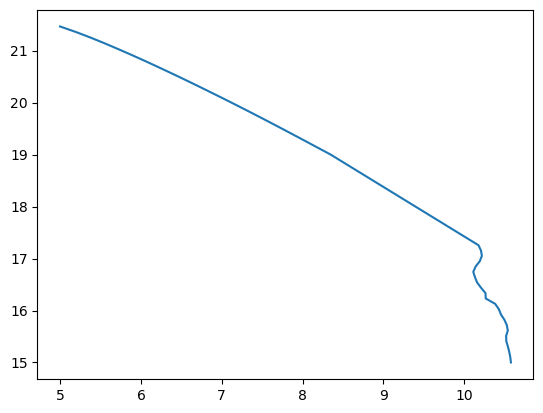

In [80]:
plt.plot(Iext_e_unionUpperMiddle,eps_unionUpperMiddle)

In [81]:
dataLowerRight= np.load('LowerFirstRightMost.npz')

In [82]:
vector_epsLowerRight =  dataLowerRight['vector_eps']
vector_Iext_eLowerRight =  dataLowerRight['vector_Iext_e']

In [87]:
vector_epsLowerRight=np.flip(vector_epsLowerRight)
vector_epsLowerRight

array([12.5       , 12.60416667, 12.70833333, 12.8125    , 12.91666667,
       13.02083333, 13.125     , 13.22916667, 13.33333333, 13.4375    ,
       13.54166667, 13.64583333, 13.75      , 13.85416667, 13.95833333,
       14.0625    , 14.16666667, 14.27083333, 14.375     , 14.47916667,
       14.58333333, 14.6875    , 14.79166667, 14.89583333, 15.        ])

In [88]:
vector_Iext_eLowerRight=np.flip(vector_Iext_eLowerRight)
vector_Iext_eLowerRight

array([12.3915871 , 12.3212746 , 12.24861835, 12.17518085, 12.09861835,
       12.01893085, 11.93768085, 11.85018085, 11.75799335, 11.65955585,
       11.55018085, 11.55486835, 11.4197121 , 11.23924336, 11.02830586,
       10.79705586, 10.77518086, 10.75018086, 10.71189961, 10.66814961,
       10.54822773, 10.53729023, 10.56697773, 10.57713398, 10.57869648])

In [89]:
eps_unionRight=np.concatenate([vector_epsLowerRight[0:len(vector_epsLowerRight)-1],eps_unionUpperMiddle])
eps_unionRight

array([12.5       , 12.60416667, 12.70833333, 12.8125    , 12.91666667,
       13.02083333, 13.125     , 13.22916667, 13.33333333, 13.4375    ,
       13.54166667, 13.64583333, 13.75      , 13.85416667, 13.95833333,
       14.0625    , 14.16666667, 14.27083333, 14.375     , 14.47916667,
       14.58333333, 14.6875    , 14.79166667, 14.89583333, 15.        ,
       15.1025641 , 15.20512821, 15.30769231, 15.41025641, 15.51282051,
       15.61538462, 15.71794872, 15.82051282, 15.92307692, 16.02564103,
       16.12820513, 16.23076923, 16.33333333, 16.43589744, 16.53846154,
       16.64102564, 16.74358974, 16.84615385, 16.94871795, 17.05128205,
       17.15384615, 17.25641026, 19.        , 19.10717391, 19.21434783,
       19.32152174, 19.42869565, 19.53586957, 19.64304348, 19.75021739,
       19.8573913 , 19.96456522, 20.07173913, 20.17891304, 20.28608696,
       20.39326087, 20.50043478, 20.6076087 , 20.71478261, 20.82195652,
       20.92913043, 21.03630435, 21.14347826, 21.25065217, 21.35

In [90]:
Iext_e_unionRight=np.concatenate([vector_Iext_eLowerRight[0:len(vector_epsLowerRight)-1],Iext_e_unionUpperMiddle])
Iext_e_unionRight

array([12.3915871 , 12.3212746 , 12.24861835, 12.17518085, 12.09861835,
       12.01893085, 11.93768085, 11.85018085, 11.75799335, 11.65955585,
       11.55018085, 11.55486835, 11.4197121 , 11.23924336, 11.02830586,
       10.79705586, 10.77518086, 10.75018086, 10.71189961, 10.66814961,
       10.54822773, 10.53729023, 10.56697773, 10.57713398, 10.57869648,
       10.57088398, 10.55760273, 10.54119648, 10.52127461, 10.51971211,
       10.54002461, 10.52791523, 10.49822773, 10.45525898, 10.42928242,
       10.3835793 , 10.26717305, 10.26404805, 10.20994648, 10.1601418 ,
       10.1335793 , 10.11248555, 10.14178242, 10.19334492, 10.21912617,
       10.20818867, 10.17693867,  8.3473    ,  8.21849141,  8.08958516,
        7.96019063,  7.83021016,  7.69930195,  7.56746602,  7.4344582 ,
        7.30018086,  7.16453633,  7.02742695,  6.88865742,  6.74861836,
        6.60721211,  6.46395039,  6.31844258,  6.17059102,  6.02000508,
        5.86609883,  5.70828633,  5.54578633,  5.37625508,  5.19

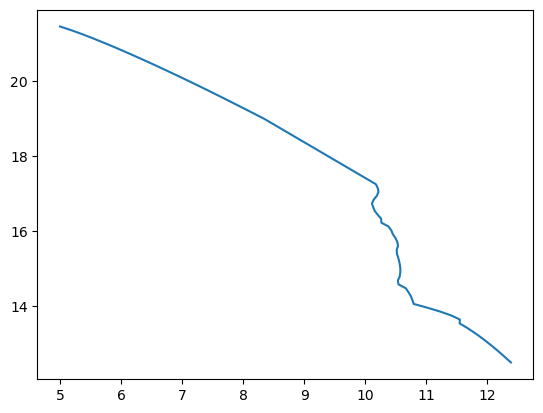

In [91]:
plt.plot(Iext_e_unionRight,eps_unionRight)

In [91]:
np.savez('CompleteRoundSecondLeftMost.npz',vector_Iext_e=vector_Iext_eLeft,vector_eps=vector_epsLeft)


## Plot all curves

### First right curve

In [92]:
dataCompleteRight = np.load('CompleteRightMost.npz')

In [93]:
vector_epsCompleteRight = dataCompleteRight['vector_eps']
vector_Iext_eCompleteRight = dataCompleteRight['vector_Iext_e']

### First left curve

In [94]:
dataCompleteLeft = np.load('CompleteLeftMost.npz')

In [95]:
vector_epsCompleteLeft = dataCompleteLeft['vector_eps']
vector_Iext_eCompleteLeft = dataCompleteLeft['vector_Iext_e']

### Second right curve

In [96]:
dataCompleteSecondRight = np.load('CompleteSecondRightMost.npz')

In [97]:
vector_epsCompleteSecondRight = dataCompleteSecondRight['vector_eps']
vector_Iext_eCompleteSecondRight = dataCompleteSecondRight['vector_Iext_e']

### Second left curve

In [98]:
dataCompleteSecondLeft = np.load('CompleteRoundSecondLeftMost.npz')

In [99]:
vector_epsCompleteSecondLeft = dataCompleteSecondLeft['vector_eps']
vector_Iext_eCompleteSecondLeft = dataCompleteSecondLeft['vector_Iext_e']

([<matplotlib.axis.XTick at 0x13f49a490>,
 [Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

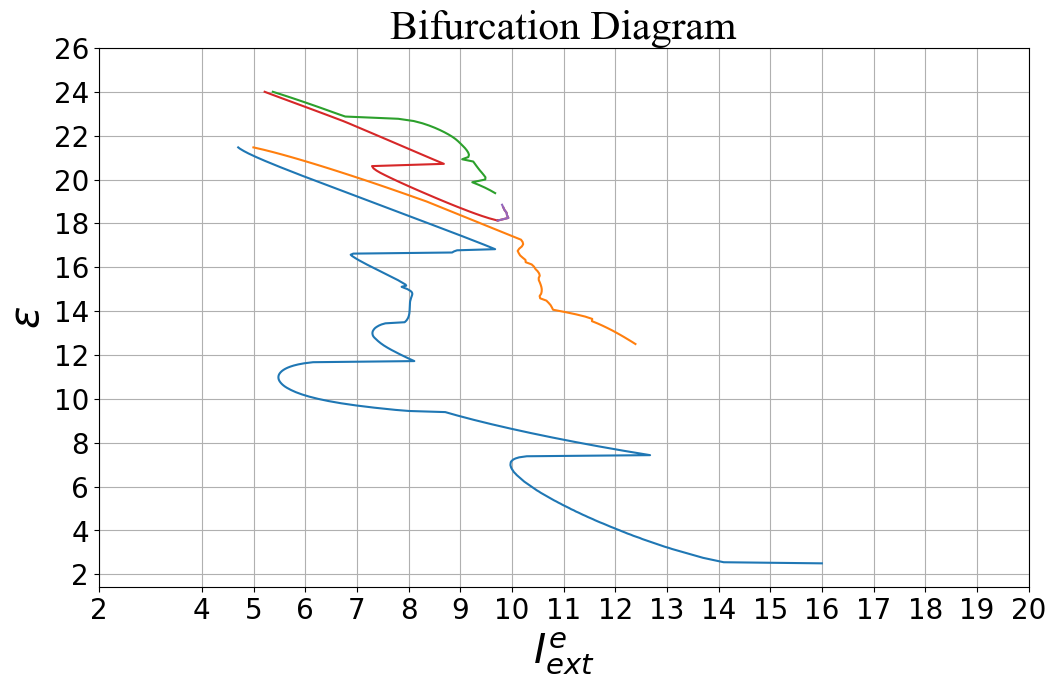

In [ ]:
fig1=plt.figure(figsize=(12,7))
ax=plt.axes()
ax.grid()
plt.title(r'Bifurcation Diagram',fontsize=30,fontname='Times New Roman')
plt.xlabel(r'$I_{ext}^e$',fontsize=30,fontname='Times New Roman')
plt.ylabel(r'$\epsilon$',fontsize=30,fontname='Times New Roman')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(vector_Iext_eCompleteLeft,vector_epsCompleteLeft)
plt.plot(vector_Iext_eCompleteRight,vector_epsCompleteRight)
plt.plot(vector_Iext_eCompleteSecondRight,vector_epsCompleteSecondRight)
plt.plot(vector_Iext_eCompleteSecondLeft,vector_epsCompleteSecondLeft)
#plt.plot(vector_Iext_eLeft,vector_epsLeft)
#plt.plot(vector_Iext_eHalf,vector_epsHalf)
plt.plot(vector_Iext_e,vector_eps)
plt.yticks([2,4,6,8,10,12,14,16,18,20,22,24,26])
plt.xticks([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])


In [76]:
vector_eps

array([18.12857143, 18.24880953, 18.36904762, 18.48928572, 18.60952381,
       18.72976191, 18.85      ])

In [79]:
vector_epsCompleteSecondLeft

array([18.12857143, 18.23285714, 18.33714286, 18.44142857, 18.54571429,
       18.65      , 18.75428571, 18.85857143, 18.96285714, 19.06714286,
       19.17142857, 19.27571429, 19.38      , 19.38      , 19.48266667,
       19.58533333, 19.688     , 19.79066667, 19.89333333, 19.996     ,
       20.09866667, 20.20133333, 20.304     , 20.40666667, 20.50933333,
       20.612     , 20.71466667, 20.81733333, 20.92      , 21.02266667,
       21.12533333, 21.228     , 21.33066667, 21.43333333, 21.536     ,
       21.63866667, 21.74133333, 21.844     , 21.94666667, 22.04933333,
       22.152     , 22.25466667, 22.35733333, 22.46      , 22.56266667,
       22.66533333, 22.768     , 22.87066667, 22.97333333, 23.076     ,
       23.17866667, 23.28133333, 23.384     , 23.48666667, 23.58933333,
       23.692     , 23.79466667, 23.89733333, 24.        ])

In [77]:
vector_Iext_e

array([9.72423437, 9.93204687, 9.90665624, 9.89674414, 9.85807226,
       9.83434179, 9.81052587])

In [78]:
vector_Iext_eCompleteSecondLeft

array([9.72423437, 9.56095312, 9.42267187, 9.29571875, 9.17540625,
       9.06134375, 8.9465    , 8.83634375, 8.72814062, 8.6215    ,
       8.51603125, 8.41251562, 8.309     , 8.309     , 8.2074375 ,
       8.10782812, 8.00939062, 7.91251563, 7.81642188, 7.72345313,
       7.63126563, 7.54220313, 7.45626563, 7.38126563, 7.32189063,
       7.29376563, 8.68458594, 8.58048438, 8.47716406, 8.37442969,
       8.27228125, 8.17032813, 8.06857031, 7.9668125 , 7.86505469,
       7.76329688, 7.66144141, 7.55939063, 7.45724219, 7.35489844,
       7.25235938, 7.149625  , 7.04698828, 6.94425391, 6.84171484,
       6.73526953, 6.62013281, 6.50441016, 6.38819922, 6.27140234,
       6.15421484, 6.03663672, 5.91866797, 5.80030859, 5.68214453,
       5.56417578, 5.44659766, 5.32980078, 5.21534766])

In [89]:
vector_epsLeft=np.concatenate([np.flip(vector_eps[0:len(vector_eps)-1]),vector_epsCompleteSecondLeft])
vector_epsLeft

array([18.72976191, 18.60952381, 18.48928572, 18.36904762, 18.24880953,
       18.12857143, 18.12857143, 18.23285714, 18.33714286, 18.44142857,
       18.54571429, 18.65      , 18.75428571, 18.85857143, 18.96285714,
       19.06714286, 19.17142857, 19.27571429, 19.38      , 19.38      ,
       19.48266667, 19.58533333, 19.688     , 19.79066667, 19.89333333,
       19.996     , 20.09866667, 20.20133333, 20.304     , 20.40666667,
       20.50933333, 20.612     , 20.71466667, 20.81733333, 20.92      ,
       21.02266667, 21.12533333, 21.228     , 21.33066667, 21.43333333,
       21.536     , 21.63866667, 21.74133333, 21.844     , 21.94666667,
       22.04933333, 22.152     , 22.25466667, 22.35733333, 22.46      ,
       22.56266667, 22.66533333, 22.768     , 22.87066667, 22.97333333,
       23.076     , 23.17866667, 23.28133333, 23.384     , 23.48666667,
       23.58933333, 23.692     , 23.79466667, 23.89733333, 24.        ])

In [88]:
vector_Iext_eLeft=np.concatenate([np.flip(vector_Iext_e[0:len(vector_eps)-1]),vector_Iext_eCompleteSecondLeft])
vector_Iext_eLeft

array([9.83434179, 9.85807226, 9.89674414, 9.90665624, 9.93204687,
       9.72423437, 9.72423437, 9.56095312, 9.42267187, 9.29571875,
       9.17540625, 9.06134375, 8.9465    , 8.83634375, 8.72814062,
       8.6215    , 8.51603125, 8.41251562, 8.309     , 8.309     ,
       8.2074375 , 8.10782812, 8.00939062, 7.91251563, 7.81642188,
       7.72345313, 7.63126563, 7.54220313, 7.45626563, 7.38126563,
       7.32189063, 7.29376563, 8.68458594, 8.58048438, 8.47716406,
       8.37442969, 8.27228125, 8.17032813, 8.06857031, 7.9668125 ,
       7.86505469, 7.76329688, 7.66144141, 7.55939063, 7.45724219,
       7.35489844, 7.25235938, 7.149625  , 7.04698828, 6.94425391,
       6.84171484, 6.73526953, 6.62013281, 6.50441016, 6.38819922,
       6.27140234, 6.15421484, 6.03663672, 5.91866797, 5.80030859,
       5.68214453, 5.56417578, 5.44659766, 5.32980078, 5.21534766])

In [45]:
vector_epsHalf

array([19.38      , 19.48266667, 19.58533333, 19.688     , 19.79066667,
       19.89333333, 19.996     , 20.09866667, 20.20133333, 20.304     ,
       20.40666667, 20.50933333, 20.612     , 20.71466667, 20.81733333,
       20.92      , 21.02266667, 21.12533333, 21.228     , 21.33066667,
       21.43333333, 21.536     , 21.63866667, 21.74133333, 21.844     ,
       21.94666667, 22.04933333, 22.152     , 22.25466667, 22.35733333,
       22.46      , 22.56266667, 22.66533333, 22.768     , 22.87066667,
       22.97333333, 23.076     , 23.17866667, 23.28133333, 23.384     ,
       23.48666667, 23.58933333, 23.692     , 23.79466667, 23.89733333,
       24.        ])

In [44]:
vector_Iext_eHalf

array([8.309     , 8.2074375 , 8.10782812, 8.00939062, 7.91251563,
       7.81642188, 7.72345313, 7.63126563, 7.54220313, 7.45626563,
       7.38126563, 7.32189063, 7.29376563, 8.68458594, 8.58048438,
       8.47716406, 8.37442969, 8.27228125, 8.17032813, 8.06857031,
       7.9668125 , 7.86505469, 7.76329688, 7.66144141, 7.55939063,
       7.45724219, 7.35489844, 7.25235938, 7.149625  , 7.04698828,
       6.94425391, 6.84171484, 6.73526953, 6.62013281, 6.50441016,
       6.38819922, 6.27140234, 6.15421484, 6.03663672, 5.91866797,
       5.80030859, 5.68214453, 5.56417578, 5.44659766, 5.32980078,
       5.21534766])

In [40]:
vector_Iext_e[0:14]

array([8.309     , 8.41251562, 8.51603125, 8.6215    , 8.72814062,
       8.83634375, 8.9465    , 9.06134375, 9.17540625, 9.29571875,
       9.42267187, 9.56095312, 9.72423437, 8.35919531])

In [48]:
vector_eps[0:13]

array([19.38      , 19.27571429, 19.17142857, 19.06714286, 18.96285714,
       18.85857143, 18.75428571, 18.65      , 18.54571429, 18.44142857,
       18.33714286, 18.23285714, 18.12857143])